In [1]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


<Axes: xlabel='age', ylabel='Count'>

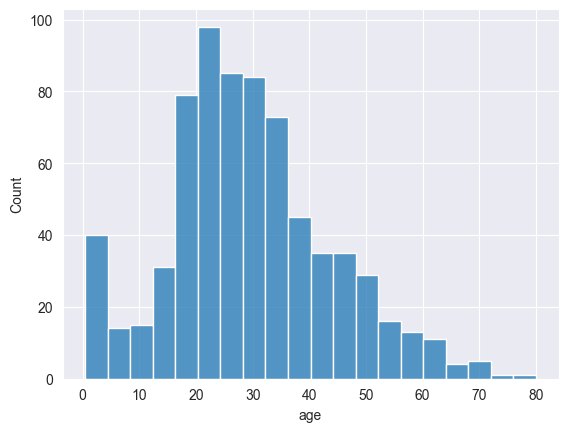

In [2]:
sns.histplot(data=titanic, x='age')

<Axes: xlabel='age', ylabel='Count'>

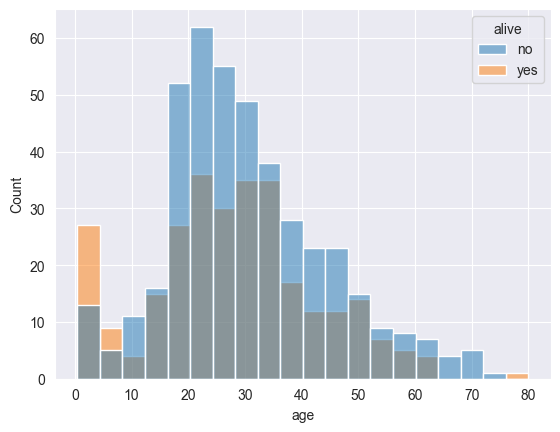

In [3]:
sns.histplot(data=titanic, x='age', hue='alive')

<Axes: xlabel='age', ylabel='Density'>

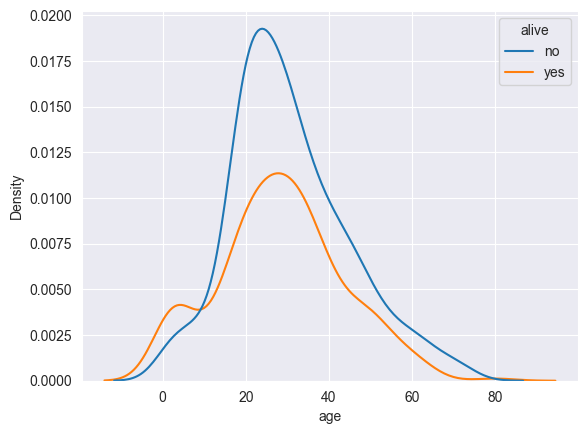

In [4]:
sns.kdeplot(data=titanic, x='age', hue='alive')

<Axes: xlabel='class', ylabel='age'>

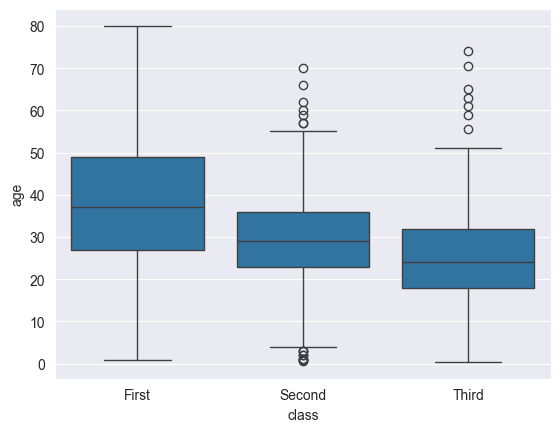

In [5]:
sns.boxplot(x='class', y='age', data=titanic)

In [8]:
import pandas as pd

train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')
submission = pd.read_csv('titanic/gender_submission.csv')

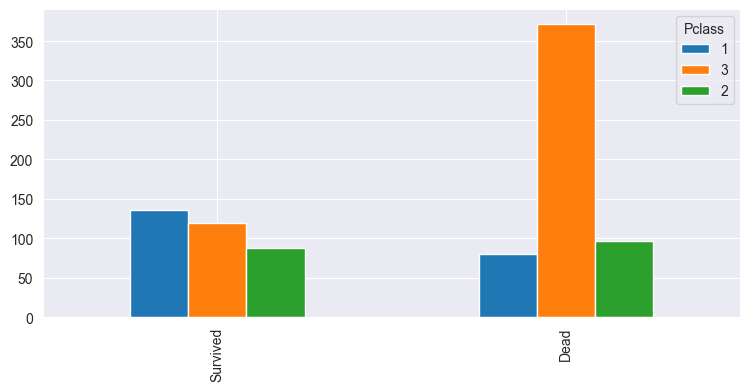

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def bar_chart(feature):
    survived = train.loc[train["Survived"]==1,feature].value_counts()  #해당 특징의 Survived 가 1인 갯수를 세어준다.
    dead = train.loc[train["Survived"]==0,feature].value_counts()
    data = pd.DataFrame([survived,dead],index = ["Survived","Dead"])
    data.plot(kind="bar",figsize=(9,4))
    plt.show()

#pclass에 따른 생존/사망자 확인
bar_chart("Pclass")

C:\Users\pione\.conda\envs\BigData240208\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\pione\.conda\envs\BigData240208\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


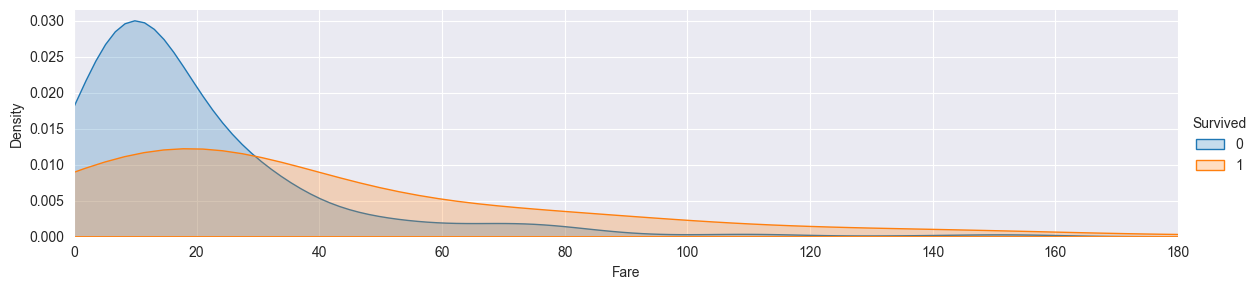

In [14]:
#fare 에 따른 생존/사망자 확인
facet = sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()
plt.xlim(0,180)
plt.show()

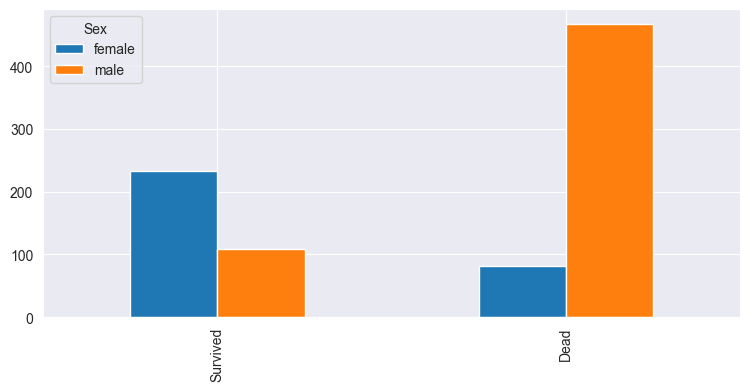

In [15]:
bar_chart('Sex')

C:\Users\pione\.conda\envs\BigData240208\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\pione\.conda\envs\BigData240208\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


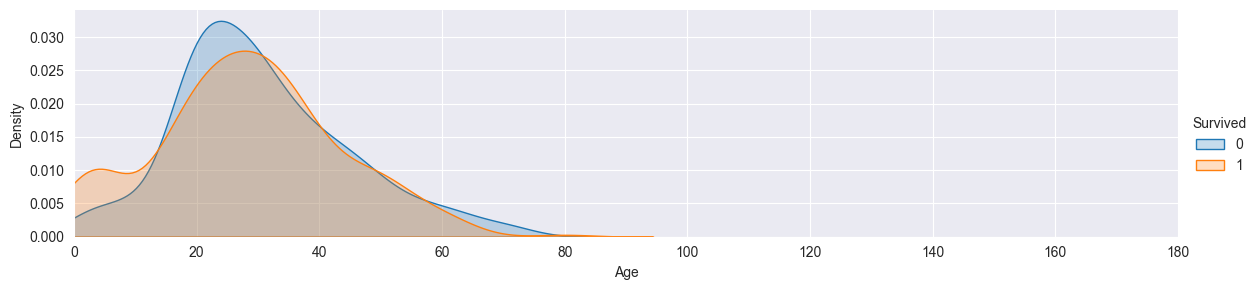

In [16]:
#age 에 따른 생존/사망자 확인
facet = sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(0,180)
plt.show()

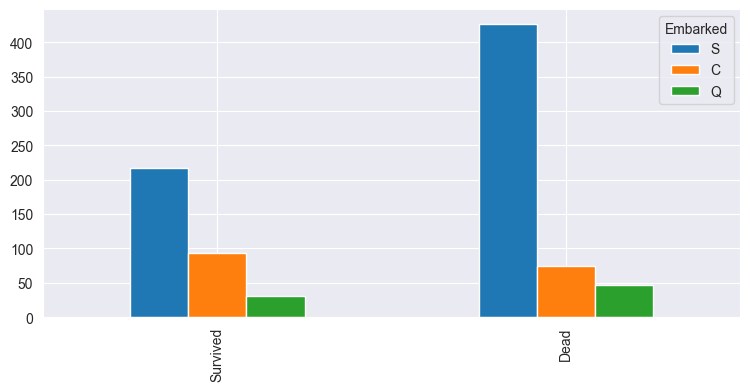

In [17]:
bar_chart('Embarked')

In [18]:
# train 데이터셋에서 결측치 여부 확인
train_missing_values = train.isnull().sum()
print("Train 데이터셋 결측치 개수:\n", train_missing_values)

# test 데이터셋에서 결측치 여부 확인
test_missing_values = test.isnull().sum()
print("\nTest 데이터셋 결측치 개수:\n", test_missing_values)


Train 데이터셋 결측치 개수:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Test 데이터셋 결측치 개수:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [19]:
# Cabin 컬럼 삭제
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

# Age와 Fare 결측치를 평균값으로 대체
train['Age'].fillna(train['Age'].mean(), inplace=True)
test['Age'].fillna(test['Age'].mean(), inplace=True)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

# Train 데이터셋에서 Embarked 컬럼이 결측치인 행 삭제
train.dropna(subset=['Embarked'], inplace=True)


In [20]:
# train 데이터셋에서 결측치 여부 확인
train_missing_values = train.isnull().sum()
print("Train 데이터셋 결측치 개수:\n", train_missing_values)

# test 데이터셋에서 결측치 여부 확인
test_missing_values = test.isnull().sum()
print("\nTest 데이터셋 결측치 개수:\n", test_missing_values)

Train 데이터셋 결측치 개수:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Test 데이터셋 결측치 개수:
 PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [21]:
# fare 구간화

ranges=[0,17,30,100,1000]
labels=[0,1,2,3]
train["FareGroup"]=pd.cut(train['Fare'],ranges,right=False,labels=labels)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FareGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [22]:
# age 구간화
# 청소년 : 0
# 청년 : 1
# 장년 : 2
# 중년 : 3
# 노년 : 4
ranges=[0,16,26,36,62,100]
labels=[0,1,2,3,4]
train["AgeGroup"]=pd.cut(train['Age'],ranges,right=False,labels=labels)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FareGroup,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,2


In [23]:
#성별을 숫자로 매핑
train['SexNum']=train['Sex'].apply(lambda x:1 if (x=='female') else 0)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FareGroup,AgeGroup,SexNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,2,3,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,2,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0,2,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,2,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,1,2,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,2,2,0


In [24]:
target = train['Survived']
data = train[['Pclass','SexNum','AgeGroup','FareGroup']]

In [25]:
 from sklearn.model_selection import train_test_split
#훈련세트와 테스트 세트 분리
train_input,test_input,train_target,test_target = train_test_split(data,target,test_size=0.2,random_state=42)

#어떤 알고리즘이 가장 성능이 좋은지 테스트 해 보자.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import numpy as np

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#K_fold cross validation 준비, 10개 구역을 나눔.
k_fold = KFold(n_splits=10,shuffle=True,random_state=42)

#KNN
knn = KNeighborsClassifier(n_neighbors=5)
score_knn = cross_val_score(knn,train_input,train_target,cv=k_fold,n_jobs=1,scoring='accuracy')

#의사결정 트리
dt = DecisionTreeClassifier()
score_dt = cross_val_score(dt,train_input,train_target,cv=k_fold,n_jobs=1,scoring='accuracy')

#랜덤 포레스트
rf = RandomForestClassifier(n_estimators=10)
score_rf = cross_val_score(rf,train_input,train_target,cv=k_fold,n_jobs=1,scoring='accuracy')

#SVM
sv = svm.SVC(gamma='auto')
score_sv = cross_val_score(sv,train_input,train_target,cv=k_fold,n_jobs=1,scoring='accuracy')

#정확도 확인
print("KNN   :",round(np.mean(score_knn)*100,2))
print("DecisionTree :",round(np.mean(score_dt)*100,2))
print("RandomForest :",round(np.mean(score_rf)*100,2))
print("SVM   :",round(np.mean(score_sv)*100,2))

KNN   : 78.47
DecisionTree : 79.73
RandomForest : 79.73
SVM   : 81.43


In [26]:
#SVM으로 모델 훈련
sv.fit(data,target)

SVC(gamma='auto')

In [27]:
# age 구간화
# 청소년 : 0
# 청년 : 1
# 장년 : 2
# 중년 : 3
# 노년 : 4
ranges=[0,16,26,36,62,100]
labels=[0,1,2,3,4]
test["AgeGroup"]=pd.cut(test['Age'],ranges,right=False,labels=labels)

# fare 구간화
ranges=[0,17,30,100,1000]
labels=[0,1,2,3]
test["FareGroup"]=pd.cut(test['Fare'],ranges,right=False,labels=labels)

#성별을 숫자로 매핑
test['SexNum']=test['Sex'].apply(lambda x:1 if (x=='female') else 0)

test_data = test[['Pclass','SexNum','AgeGroup','FareGroup']]
print(test_data)

     Pclass  SexNum AgeGroup FareGroup
0         3       0        2         0
1         3       1        3         0
2         2       0        4         0
3         3       0        2         0
4         3       1        1         0
..      ...     ...      ...       ...
413       3       0        2         0
414       1       1        3         3
415       3       0        3         0
416       3       0        2         0
417       3       0        2         1

[418 rows x 4 columns]


In [29]:
pred = sv.predict(test_data)

In [30]:
print(pred)

[0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [34]:
# 예측에 사용할 임의의 특성 데이터 생성 =
new_passenger_data = {
    'Pclass': [1],         # 객실 등급
    'SexNum': [1],     # 성별
    'AgeGroup': [0],           # 나이
    'FareGroup': [4],          # 지불한 운임
}

# 임의의 특성 데이터를 DataFrame으로 변환
new_passenger_df = pd.DataFrame(new_passenger_data)

# 모델에 새로운 데이터를 입력하여 예측
prediction = sv.predict(new_passenger_df)

# 예측 결과 출력
print("생존 여부 예측:", prediction)

생존 여부 예측: [1]


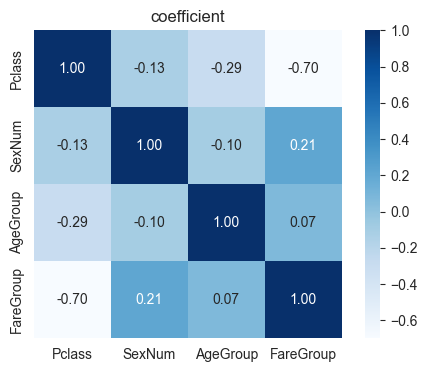

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = data

# 피어슨 상관계수 계산
corr = df.corr(method='pearson')

# 히트맵 그리기
plt.figure(figsize=(6, 4))
df_heatmap = sns.heatmap(corr, cbar=True, annot=True, annot_kws={'size': 10}, fmt='.2f', square=True, cmap='Blues')
plt.title("coefficient")
plt.show()
